In [75]:
#Cargamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [76]:
#Cargamos el archivo csv
df = pd.read_csv('DataAnalyticsCat.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.rename(columns={'presionó botón correcto': 'presionó_botón_correcto'})
df = df.rename(columns={'tiempo de interacción': 'tiempo_de_interacción'})
df = df.rename(columns={'mini juego': 'mini_juego'})
df = df.rename(columns={'número de interacción por lección': 'número_de_interacción_por_lección'})
df = df.rename(columns={'color presionado': 'color_presionado'})
df = df.rename(columns={'auto push': 'auto_push'})
df = df.rename(columns={'tiempo de lección': 'tiempo_de_lección'})
df = df.rename(columns={'tiempo de sesión': 'tiempo_de_sesión'})
df.head(10)

,administrador,usuario,presionó_botón_correcto,tiempo_de_interacción,mini_juego,número_de_interacción_por_lección,color_presionado,dificultad,fecha,juego,auto_push,tiempo_de_lección,tiempo_de_sesión
0,nicolas,nicolas,Si,5.399169,Despegue,1.0,blue,Episodio 1,25/01/2024 09:26,Astro,No,0.0,0.0
1,nicolas,nicolas,No,1.283400,Despegue,2.0,violet,Episodio 1,25/01/2024 09:26,Astro,No,0.0,0.0
2,nicolas,nicolas,Si,2.700226,Despegue,3.0,green,Episodio 1,25/01/2024 09:26,Astro,No,0.0,0.0
3,nicolas,nicolas,No,3.050262,Despegue,4.0,green,Episodio 1,25/01/2024 09:26,Astro,No,0.0,0.0
4,nicolas,nicolas,No,4.750256,Despegue,5.0,green,Episodio 1,25/01/2024 09:26,Astro,No,0.0,0.0
5,nicolas,nicolas,No,7.400463,Despegue,6.0,green,Episodio 1,25/01/2024 09:27,Astro,No,0.0,0.0
6,nicolas,nicolas,No,13.167350,Despegue,7.0,green,Episodio 1,25/01/2024 09:27,Astro,No,0.0,0.0
7,nicolas,nicolas,Si,22.467780,Despegue,8.0,yellow,Episodio 1,25/01/2024 09:27,Astro,No,0.0,0.0
8,nicolas,nicolas,No,14.517180,Despegue,9.0,green,Episodio 1,25/01/2024 09:27,Astro,No,0.0,0.0
9,nicolas,nicolas,No,15.617350,Despegue,10.0,blue,Episodio 1,25/01/2024 09:27,Astro,No,0.0,0.0


In [77]:
#Identificar valores nulos por columna
valores_nulos = df.isnull().sum()
valores_nulos

administrador                        0
usuario                              0
presionó_botón_correcto              0
tiempo_de_interacción                0
mini_juego                           0
número_de_interacción_por_lección    0
color_presionado                     0
dificultad                           0
fecha                                0
juego                                0
auto_push                            0
tiempo_de_lección                    0
tiempo_de_sesión                     0
dtype: int64

### Realizar 1 análisis de varianza (ANOVA y MANOVA) para cada una de las variables numéricas del dataframe del socioformador Wuupi, aplicando la herramienta de “ANOVA”

### Tiempo de interacción

<Axes: title={'center': 'tiempo_de_interacción'}, xlabel='presionó_botón_correcto'>

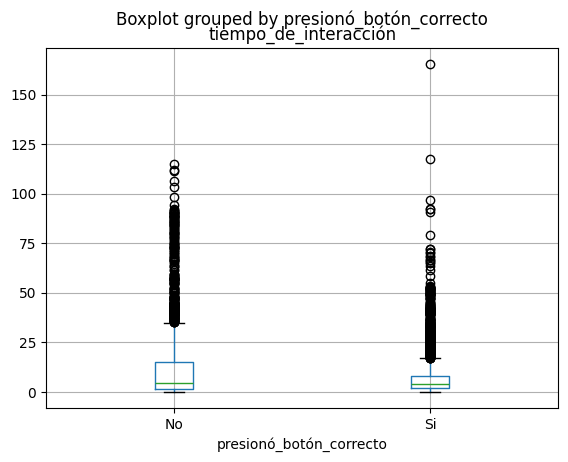

In [78]:
#Analizamos los diagramas de caja de la variable objetivo 'tiempo de interacción' por cada categoría de la variable independiente 'presionó botón correcto'
df.boxplot('tiempo_de_interacción',by='presionó_botón_correcto')

In [79]:
#Obtengo las categorías de la variable (presionó botón correcto)
grupos = pd.unique(df['presionó_botón_correcto'].values)
grupos

array(['Si', 'No'], dtype=object)

#### SCIPY ONEWAY (ANOVA)

In [80]:
#Defino grupos donde me entrega la columna tiempo de interacción separada por grupos de las categorías de la columna presionó botón correcto: 'Si' y 'No'
Tiempo_Interaccion_1 = df.tiempo_de_interacción[df.presionó_botón_correcto=='Si']
Tiempo_Interaccion_2 = df.tiempo_de_interacción[df.presionó_botón_correcto=='No']

In [81]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
#p-value < 0.05, implica que la variable categórica influye en la variable cuantitativa
anova = stats.f_oneway(Tiempo_Interaccion_1,Tiempo_Interaccion_2)
anova

F_onewayResult(statistic=np.float64(90.8934803897955), pvalue=np.float64(2.1652341324617538e-21))

#### STATESMODEL (ANOVA)

In [82]:
#p-value <0.05, se rechaza la hipótesis de que todas las medias son iguales
mod = ols('tiempo_de_interacción ~ presionó_botón_correcto', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                             df        sum_sq       mean_sq         F  \
presionó_botón_correcto     1.0  1.942172e+04  19421.722116  90.89348   
Residual                 5863.0  1.252780e+06    213.675635       NaN   

                               PR(>F)  
presionó_botón_correcto  2.165234e-21  
Residual                          NaN  


In [83]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod= ols('tiempo_de_interacción ~ presionó_botón_correcto + auto_push + presionó_botón_correcto:auto_push', data=df).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                                       df        sum_sq       mean_sq  \
presionó_botón_correcto               1.0  1.942172e+04  19421.722116   
auto_push                             1.0  9.825190e+04  98251.900258   
presionó_botón_correcto:auto_push     1.0  2.129427e+01     21.294265   
Residual                           5862.0  1.154528e+06    196.951270   

                                            F         PR(>F)  
presionó_botón_correcto             98.611814   4.667825e-23  
auto_push                          498.864009  4.039803e-106  
presionó_botón_correcto:auto_push    0.108119   7.423071e-01  
Residual                                  NaN            NaN  


### Número de interacción por lección

<Axes: title={'center': 'número_de_interacción_por_lección'}, xlabel='presionó_botón_correcto'>

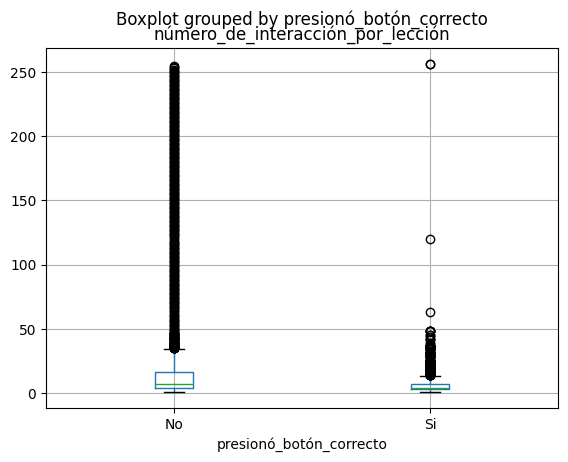

In [84]:
#Analizamos los diagramas de caja de la variable objetivo 'tiempo de interacción' por cada categoría de la variable independiente 'presionó botón correcto'
df.boxplot('número_de_interacción_por_lección',by='presionó_botón_correcto')

In [85]:
#Obtengo las categorías de la variable (presionó botón correcto)
grupos = pd.unique(df['presionó_botón_correcto'].values)
grupos

array(['Si', 'No'], dtype=object)

#### SCIPY ONEWAY (ANOVA)

In [86]:
#Defino grupos donde me entrega la columna número de interacción por lección separada por grupos de las categorías de la columna presionó botón correcto: 'Si' y 'No'
Interaccion_por_leccion_1 = df.número_de_interacción_por_lección[df.presionó_botón_correcto=='Si']
Interaccion_por_leccion_2 = df.número_de_interacción_por_lección[df.presionó_botón_correcto=='No']

In [87]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
#p-value < 0.05, implica que la variable categórica influye en la variable cuantitativa
anova = stats.f_oneway(Interaccion_por_leccion_1,Interaccion_por_leccion_2)
anova

F_onewayResult(statistic=np.float64(356.32177839477373), pvalue=np.float64(3.337241843673127e-77))

#### STATESMODEL (ANOVA)

In [88]:
#p-value <0.05, se rechaza la hipótesis de que todas las medias son iguales
mod = ols('número_de_interacción_por_lección ~ presionó_botón_correcto', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                             df        sum_sq        mean_sq           F  \
presionó_botón_correcto     1.0  3.061922e+05  306192.152686  356.321778   
Residual                 5863.0  5.038156e+06     859.313607         NaN   

                               PR(>F)  
presionó_botón_correcto  3.337242e-77  
Residual                          NaN  


In [89]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod= ols('número_de_interacción_por_lección ~ presionó_botón_correcto + color_presionado + presionó_botón_correcto:color_presionado', data=df).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                                              df        sum_sq        mean_sq  \
presionó_botón_correcto                      1.0  3.061922e+05  306192.152686   
color_presionado                             4.0  3.757463e+05   93936.582045   
presionó_botón_correcto:color_presionado     4.0  3.919902e+05   97997.550230   
Residual                                  5856.0  4.270424e+06     729.238987   

                                                   F         PR(>F)  
presionó_botón_correcto                   419.879022   3.541395e-90  
color_presionado                          128.814536  1.382730e-105  
presionó_botón_correcto:color_presionado  134.383312  5.241872e-110  
Residual                                         NaN            NaN  


### Tiempo de lección

<Axes: title={'center': 'tiempo_de_lección'}, xlabel='auto_push'>

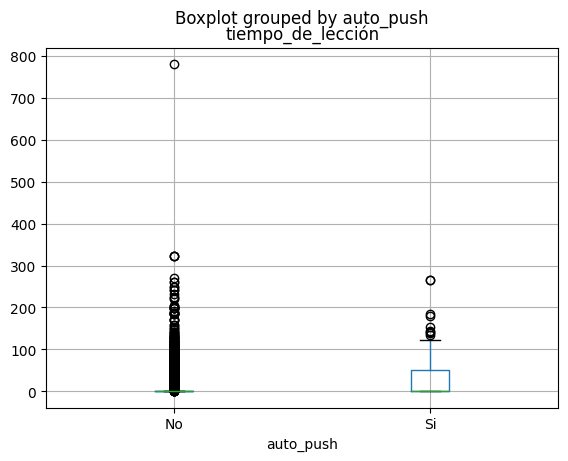

In [90]:
#Analizamos los diagramas de caja de la variable objetivo 'tiempo de interacción' por cada categoría de la variable independiente 'presionó botón correcto'
df.boxplot('tiempo_de_lección',by='auto_push')

In [91]:
#Obtengo las categorías de la variable (presionó botón correcto)
grupos = pd.unique(df['auto_push'].values)
grupos

array(['No', 'Si'], dtype=object)

#### SCIPY ONEWAY (ANOVA)

In [92]:
#Defino grupos donde me entrega la columna tiempo de lección separada por grupos de las categorías de la columna auto_push: 'Si' y 'No'
Tiempo_de_leccion_1 = df.tiempo_de_lección[df.auto_push=='Si']
Tiempo_de_leccion_2 = df.tiempo_de_lección[df.auto_push=='No']

In [93]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
#p-value < 0.05, implica que la variable categórica influye en la variable cuantitativa
anova = stats.f_oneway(Tiempo_de_leccion_1,Tiempo_de_leccion_2)
anova

F_onewayResult(statistic=np.float64(65.14238432923062), pvalue=np.float64(8.384552322833505e-16))

#### STATESMODEL (ANOVA)

In [94]:
#p-value <0.05, se rechaza la hipótesis de que todas las medias son iguales
mod = ols('tiempo_de_lección ~ auto_push', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

               df        sum_sq       mean_sq          F        PR(>F)
auto_push     1.0  5.320400e+04  53203.996685  65.142384  8.384552e-16
Residual   5863.0  4.788511e+06    816.733947        NaN           NaN


In [95]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod= ols('tiempo_de_lección ~ auto_push + mini_juego + auto_push:mini_juego', data=df).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                          df        sum_sq       mean_sq          F  \
auto_push                1.0  5.320400e+04  53203.996685  66.166234   
mini_juego              12.0  8.258264e+04   6881.886595   8.558540   
auto_push:mini_juego    12.0  4.137945e+03    344.828711   0.428840   
Residual              5848.0  4.702353e+06    804.095882        NaN   

                            PR(>F)  
auto_push             5.018500e-16  
mini_juego            2.363258e-16  
auto_push:mini_juego  9.528442e-01  
Residual                       NaN  


### Tiempo de sesión

<Axes: title={'center': 'tiempo_de_sesión'}, xlabel='auto_push'>

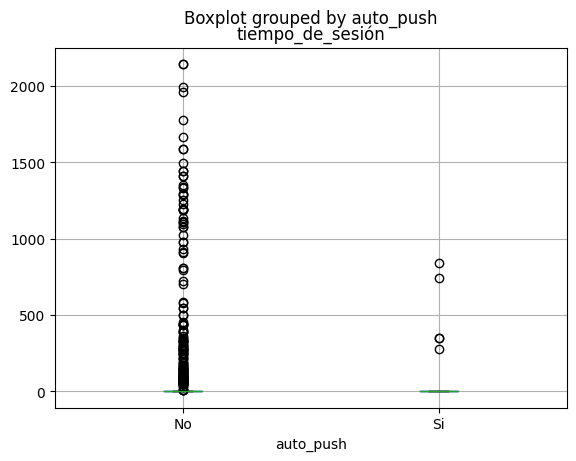

In [96]:
#Analizamos los diagramas de caja de la variable objetivo 'tiempo de interacción' por cada categoría de la variable independiente 'presionó botón correcto'
df.boxplot('tiempo_de_sesión',by='auto_push')

In [97]:
#Obtengo las categorías de la variable (presionó botón correcto)
grupos = pd.unique(df['auto_push'].values)
grupos

array(['No', 'Si'], dtype=object)

#### SCIPY ONEWAY (ANOVA)

In [98]:
#Defino grupos donde me entrega la columna tiempo de lección separada por grupos de las categorías de la columna auto_push: 'Si' y 'No'
Tiempo_de_sesion_1 = df.tiempo_de_sesión[df.auto_push=='Si']
Tiempo_de_sesion_2 = df.tiempo_de_sesión[df.auto_push=='No']

In [99]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
#p-value < 0.05, implica que la variable categórica influye en la variable cuantitativa
anova = stats.f_oneway(Tiempo_de_leccion_1,Tiempo_de_leccion_2)
anova

F_onewayResult(statistic=np.float64(65.14238432923062), pvalue=np.float64(8.384552322833505e-16))

#### STATESMODEL (ANOVA)

In [100]:
#p-value <0.05, se rechaza la hipótesis de que todas las medias son iguales
mod = ols('tiempo_de_sesión ~ auto_push', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

               df        sum_sq       mean_sq         F    PR(>F)
auto_push     1.0  2.808754e+04  28087.537348  2.007794  0.156546
Residual   5863.0  8.201898e+07  13989.250971       NaN       NaN


In [101]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod= ols('tiempo_de_sesión ~ auto_push + color_presionado + auto_push:color_presionado', data=df).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                                df        sum_sq        mean_sq          F  \
auto_push                      1.0  2.808754e+04   28087.537348   2.025825   
color_presionado               4.0  7.976200e+05  199404.996802  14.382168   
auto_push:color_presionado     4.0  2.963533e+04    7408.832219   0.534365   
Residual                    5856.0  8.119191e+07   13864.738113        NaN   

                                  PR(>F)  
auto_push                   1.546982e-01  
color_presionado            1.092354e-11  
auto_push:color_presionado  7.104983e-01  
Residual                             NaN  
